In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split

1. **Baseline Model**:
Start with a very simple baseline model, such as a single convolutional layer, a max-pooling layer, and a dense layer. This model will likely underfit the data, but it will serve as a starting point.



Epoch 1/10
313/313 [==============================] - 5s 7ms/step - loss: 1.7362 - accuracy: 0.3840 - val_loss: 1.5182 - val_accuracy: 0.4673
Epoch 2/10
313/313 [==============================] - 2s 6ms/step - loss: 1.4466 - accuracy: 0.4906 - val_loss: 1.3807 - val_accuracy: 0.5159
Epoch 3/10
313/313 [==============================] - 2s 6ms/step - loss: 1.3249 - accuracy: 0.5376 - val_loss: 1.3078 - val_accuracy: 0.5414
Epoch 4/10
313/313 [==============================] - 2s 6ms/step - loss: 1.2326 - accuracy: 0.5709 - val_loss: 1.2546 - val_accuracy: 0.5620
Epoch 5/10
313/313 [==============================] - 2s 6ms/step - loss: 1.1682 - accuracy: 0.5918 - val_loss: 1.2129 - val_accuracy: 0.5746
Epoch 6/10
313/313 [==============================] - 2s 6ms/step - loss: 1.1254 - accuracy: 0.6103 - val_loss: 1.1911 - val_accuracy: 0.5864
Epoch 7/10
313/313 [==============================] - 2s 6ms/step - loss: 1.0854 - accuracy: 0.6256 - val_loss: 1.1655 - val_accuracy: 0.5909
Epoch 

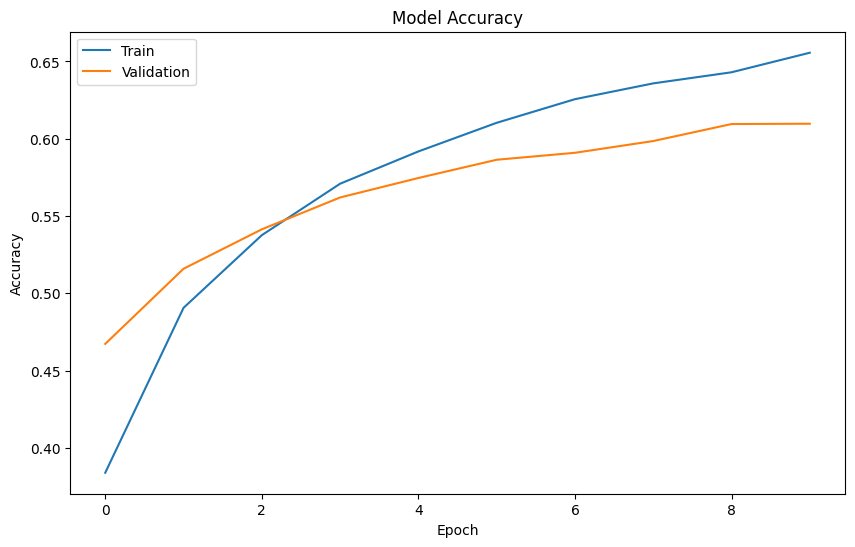

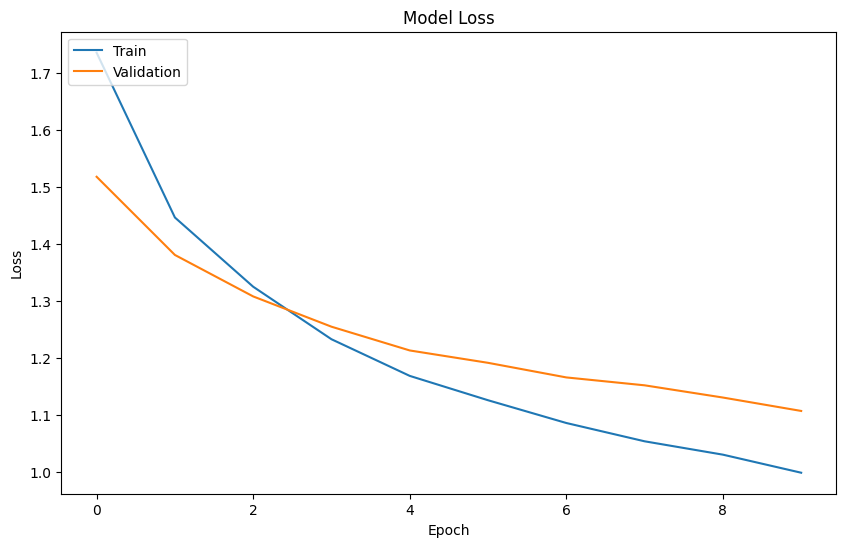

Model saved as baseline_model_20240527_000009_acc_0.6065.h5


In [2]:
# 1
# Check if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("GPU not available, using CPU.")

# Load and preprocess the CIFAR-10 dataset
def load_data():
    (x, y), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    x, x_test = x / 255.0, x_test / 255.0
    y, y_test = tf.keras.utils.to_categorical(y, 10), tf.keras.utils.to_categorical(y_test, 10)

    # Split the data into train and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

    return x_train, y_train, x_val, y_val, x_test, y_test

# Define the input shape
def get_input_shape(x_train):
    input_shape = x_train.shape[1:]
    return input_shape

# Build the baseline model
def build_baseline_model(input_shape):
    model = tf.keras.Sequential([
        Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# # Train the model
# def train_model(model, x_train, y_train, x_test, y_test, epochs=10):
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     history = model.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_data=(x_test, y_test))
#     return history

def train_model(model, x_train, y_train, x_val, y_val, epochs=10):
    history = model.fit(x_train, y_train, batch_size=128,
                        epochs=epochs, validation_data=(x_val, y_val)
                        )
    return history

# Evaluate the model
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f'Test accuracy: {test_acc}')
    return test_acc

def plot_metrics(history):
    # Plot accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Save the model with a timestamp and accuracy in the filename
def save_model(model, test_acc):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_filename = f"baseline_model_{timestamp}_acc_{test_acc:.4f}.h5"
    model.save(model_filename)
    print(f"Model saved as {model_filename}")

# Main function
def main():
    x_train, y_train, x_val, y_val, x_test, y_test = load_data()
    input_shape = get_input_shape(x_train)
    model = build_baseline_model(input_shape)

    epochs = 10
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = train_model(model, x_train, y_train, x_val, y_val,epochs)
    test_acc = evaluate_model(model, x_test, y_test)
    plot_metrics(history)
    save_model(model, test_acc)

if __name__ == "__main__":
    main()

2. Increasing Model Depth:

Experiment: The number of convolutional layers was gradually increased to capture more complex features from the CIFAR-10 dataset.


Epoch 1/20
313/313 [==============================] - 4s 10ms/step - loss: 1.6322 - accuracy: 0.4031 - val_loss: 1.3433 - val_accuracy: 0.5170
Epoch 2/20
313/313 [==============================] - 3s 9ms/step - loss: 1.2414 - accuracy: 0.5574 - val_loss: 1.1550 - val_accuracy: 0.5957
Epoch 3/20
313/313 [==============================] - 3s 9ms/step - loss: 1.0738 - accuracy: 0.6232 - val_loss: 1.1099 - val_accuracy: 0.6122
Epoch 4/20
313/313 [==============================] - 3s 9ms/step - loss: 0.9393 - accuracy: 0.6711 - val_loss: 0.9319 - val_accuracy: 0.6735
Epoch 5/20
313/313 [==============================] - 3s 9ms/step - loss: 0.8409 - accuracy: 0.7054 - val_loss: 0.8841 - val_accuracy: 0.6911
Epoch 6/20
313/313 [==============================] - 3s 9ms/step - loss: 0.7610 - accuracy: 0.7345 - val_loss: 0.8674 - val_accuracy: 0.6985
Epoch 7/20
313/313 [==============================] - 3s 9ms/step - loss: 0.6968 - accuracy: 0.7560 - val_loss: 0.8572 - val_accuracy: 0.7120
Epoch

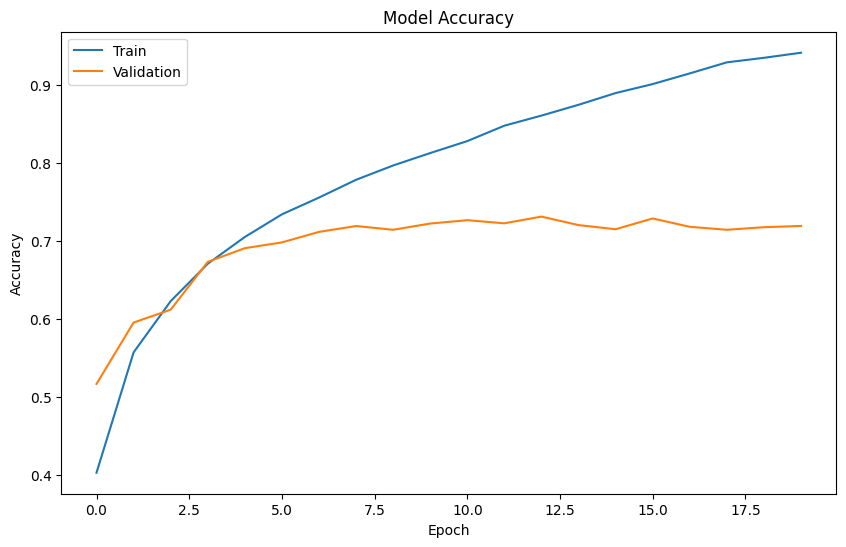

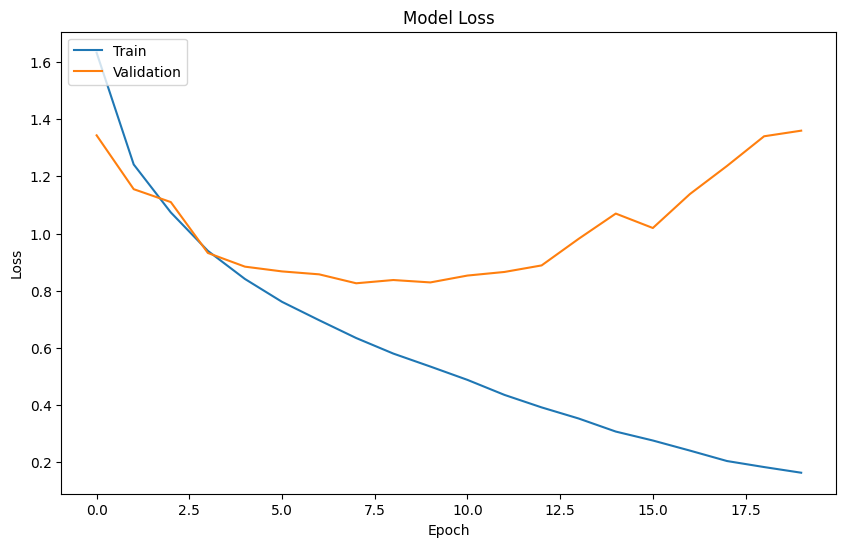

Model saved as deeper_model_20240527_000111_acc_0.7137.h5


In [3]:
# 2
# Check if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("GPU not available, using CPU.")

# Load and preprocess the CIFAR-10 dataset
def load_data():
    (x, y), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    x, x_test = x / 255.0, x_test / 255.0
    y, y_test = tf.keras.utils.to_categorical(y, 10), tf.keras.utils.to_categorical(y_test, 10)

    # Split the data into train and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

    return x_train, y_train, x_val, y_val, x_test, y_test

# Define the input shape
def get_input_shape(x_train):
    input_shape = x_train.shape[1:]
    return input_shape

# Build the deeper model
def build_deeper_model(input_shape):
    model = tf.keras.Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Train the model
def train_model(model, x_train, y_train, x_val, y_val, epochs=20):
    history = model.fit(x_train, y_train, batch_size=128,
                        epochs=epochs, validation_data=(x_val, y_val)
                        )
    return history

# Evaluate the model
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f'Test accuracy: {test_acc}')
    return test_acc

# Plot training and validation metrics
def plot_metrics(history):
    # Plot accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Save the model with a timestamp and accuracy in the filename
def save_model(model, test_acc):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_filename = f"deeper_model_{timestamp}_acc_{test_acc:.4f}.h5"
    model.save(model_filename)
    print(f"Model saved as {model_filename}")

# Main function
def main():
    x_train, y_train, x_val, y_val, x_test, y_test = load_data()
    input_shape = get_input_shape(x_train)
    model = build_deeper_model(input_shape)

    epochs = 20
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = train_model(model, x_train, y_train, x_val, y_val,epochs)
    test_acc = evaluate_model(model, x_test, y_test)
    plot_metrics(history)
    save_model(model, test_acc)

if __name__ == "__main__":
    main()

3. Batch Normalization:

Experiment: Batch normalization layers were added after each convolutional layer.


Epoch 1/30
313/313 [==============================] - 4s 12ms/step - loss: 1.3128 - accuracy: 0.5428 - val_loss: 2.8852 - val_accuracy: 0.2089
Epoch 2/30
313/313 [==============================] - 4s 11ms/step - loss: 0.8749 - accuracy: 0.6913 - val_loss: 1.0162 - val_accuracy: 0.6426
Epoch 3/30
313/313 [==============================] - 3s 11ms/step - loss: 0.7054 - accuracy: 0.7527 - val_loss: 0.9001 - val_accuracy: 0.6899
Epoch 4/30
313/313 [==============================] - 3s 11ms/step - loss: 0.5827 - accuracy: 0.7958 - val_loss: 1.0534 - val_accuracy: 0.6553
Epoch 5/30
313/313 [==============================] - 3s 11ms/step - loss: 0.4712 - accuracy: 0.8371 - val_loss: 0.9199 - val_accuracy: 0.7002
Epoch 6/30
313/313 [==============================] - 3s 11ms/step - loss: 0.3864 - accuracy: 0.8672 - val_loss: 0.8561 - val_accuracy: 0.7273
Epoch 7/30
313/313 [==============================] - 3s 11ms/step - loss: 0.3028 - accuracy: 0.8972 - val_loss: 1.0058 - val_accuracy: 0.7085

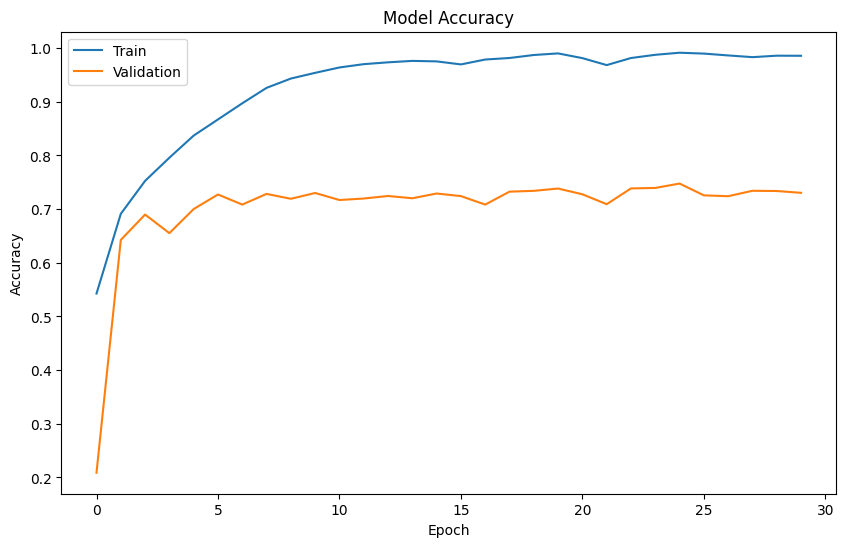

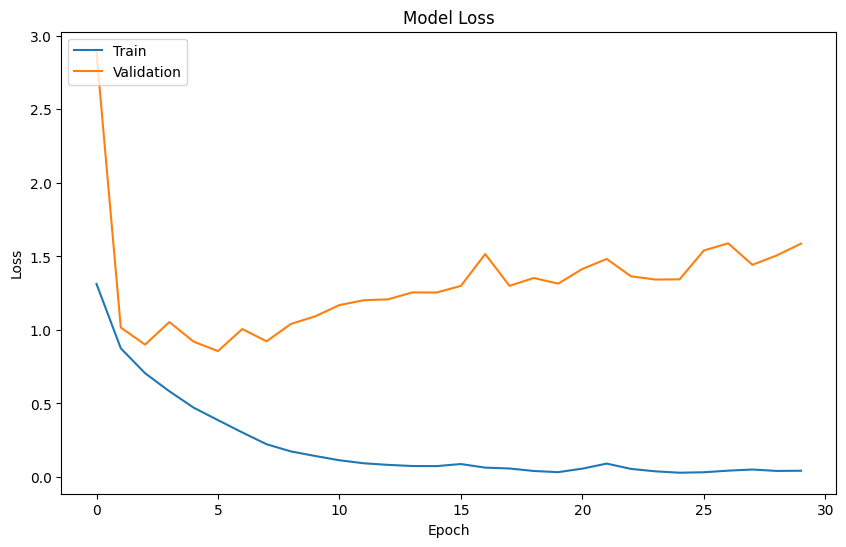

Model saved as batchnorm_model_20240527_000301_acc_0.7227.h5


In [4]:


# Check if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("GPU not available, using CPU.")

# Load and preprocess the CIFAR-10 dataset
def load_data():
    (x, y), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    x, x_test = x / 255.0, x_test / 255.0
    y, y_test = tf.keras.utils.to_categorical(y, 10), tf.keras.utils.to_categorical(y_test, 10)

    # Split the data into train and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

    return x_train, y_train, x_val, y_val, x_test, y_test

# Define the input shape
def get_input_shape(x_train):
    input_shape = x_train.shape[1:]
    return input_shape

# Build the model with batch normalization
def build_model_with_batch_norm(input_shape):
    model = tf.keras.Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])
    return model

def train_model(model, x_train, y_train, x_val, y_val, epochs=30):
    history = model.fit(x_train, y_train, batch_size=128,
                        epochs=epochs, validation_data=(x_val, y_val)
                        )
    return history

# Evaluate the model
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f'Test accuracy: {test_acc}')
    return test_acc

def plot_metrics(history):
    # Plot accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
# Save the model with a timestamp and accuracy in the filename
def save_model(model, test_acc):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_filename = f"batchnorm_model_{timestamp}_acc_{test_acc:.4f}.h5"
    model.save(model_filename)
    print(f"Model saved as {model_filename}")

# Main function
def main():
    x_train, y_train, x_val, y_val, x_test, y_test = load_data()
    input_shape = get_input_shape(x_train)
    model = build_model_with_batch_norm(input_shape)

    epochs = 30
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = train_model(model, x_train, y_train, x_val, y_val,epochs)
    test_acc = evaluate_model(model, x_test, y_test)
    plot_metrics(history)
    save_model(model, test_acc)

if __name__ == "__main__":
    main()

4. Data Augmentation:

Experiment: Image data augmentation techniques were applied to expand the training dataset and improve the model's ability to generalize.

Epoch 1/30
313/313 [==============================] - 20s 62ms/step - loss: 1.4366 - accuracy: 0.4873 - val_loss: 2.8571 - val_accuracy: 0.1890
Epoch 2/30
313/313 [==============================] - 19s 61ms/step - loss: 1.0979 - accuracy: 0.6113 - val_loss: 1.1002 - val_accuracy: 0.6152
Epoch 3/30
313/313 [==============================] - 19s 62ms/step - loss: 0.9563 - accuracy: 0.6629 - val_loss: 1.0225 - val_accuracy: 0.6445
Epoch 4/30
313/313 [==============================] - 19s 60ms/step - loss: 0.8769 - accuracy: 0.6916 - val_loss: 0.8604 - val_accuracy: 0.7042
Epoch 5/30
313/313 [==============================] - 19s 61ms/step - loss: 0.8192 - accuracy: 0.7104 - val_loss: 0.8000 - val_accuracy: 0.7210
Epoch 6/30
313/313 [==============================] - 19s 61ms/step - loss: 0.7762 - accuracy: 0.7282 - val_loss: 0.8632 - val_accuracy: 0.7007
Epoch 7/30
313/313 [==============================] - 19s 62ms/step - loss: 0.7353 - accuracy: 0.7406 - val_loss: 0.9544 - val_accuracy:

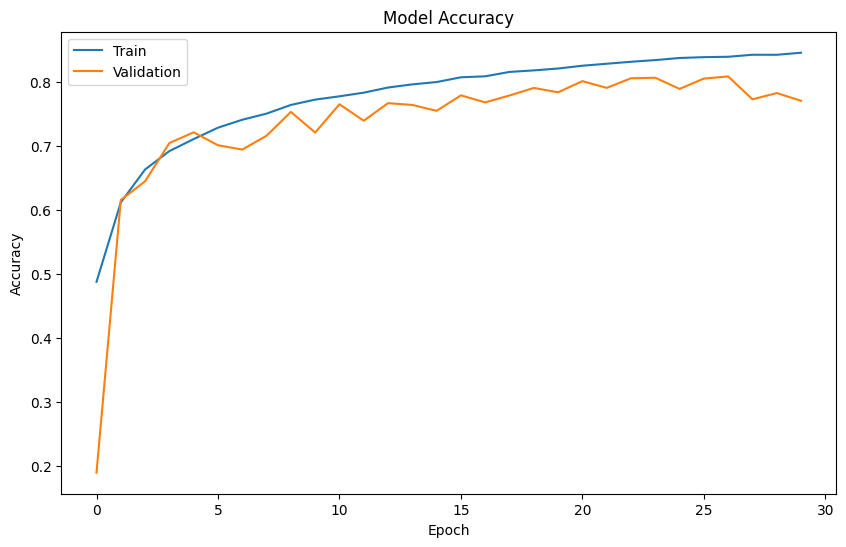

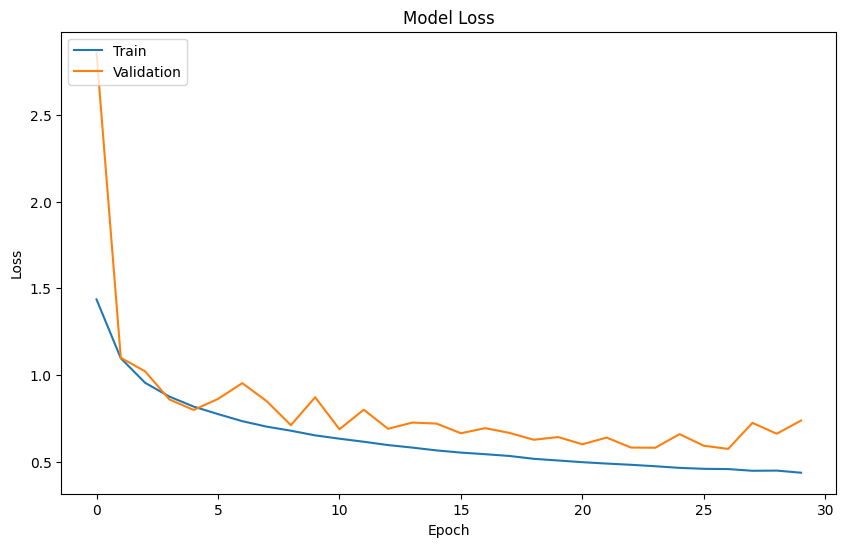

Model saved as augmented_model_20240527_001239_acc_0.7593.h5


In [5]:


# Check if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("GPU not available, using CPU.")

# Load and preprocess the CIFAR-10 dataset
def load_data():
    (x, y), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    x, x_test = x / 255.0, x_test / 255.0
    y, y_test = tf.keras.utils.to_categorical(y, 10), tf.keras.utils.to_categorical(y_test, 10)

    # Split the data into train and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

    return x_train, y_train, x_val, y_val, x_test, y_test

# Define the input shape
def get_input_shape(x_train):
    input_shape = x_train.shape[1:]
    return input_shape

# Apply data augmentation
def augment_data(x_train):
    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    )
    datagen.fit(x_train)
    return datagen

# Build the model
def build_model(input_shape):
    model = tf.keras.Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])
    return model

# # Train the model
# def train_model(model, x_train, y_train, x_test, y_test, datagen, epochs=30):
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
#                         epochs=epochs, validation_data=(x_test, y_test))
#     return history

def train_model(model, x_train, y_train, x_val, y_val, datagen, epochs=30):
    history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                        epochs=epochs, validation_data=(x_val, y_val)
                       )
    return history

# Evaluate the model
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f'Test accuracy: {test_acc}')
    return test_acc

def plot_metrics(history):
    # Plot accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Save the model with a timestamp and accuracy in the filename
def save_model(model, test_acc):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_filename = f"augmented_model_{timestamp}_acc_{test_acc:.4f}.h5"
    model.save(model_filename)
    print(f"Model saved as {model_filename}")

# Main function
def main():
    x_train, y_train, x_val, y_val, x_test, y_test = load_data()
    datagen = augment_data(x_train)
    input_shape = get_input_shape(x_train)
    model = build_model(input_shape)
    
    epochs = 30

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = train_model(model, x_train, y_train,  x_val, y_val, datagen, epochs)
    test_acc = evaluate_model(model, x_test, y_test)
    plot_metrics(history)
    save_model(model, test_acc)

if __name__ == "__main__":
    main()

5. Learning Rate and Optimizer:

Experiment: Different learning rates and optimizers were likely tested to find the best combination for fast convergence and good performance.


Training with adam optimizer and learning rate: 0.001
Epoch 1/30
313/313 [==============================] - 20s 61ms/step - loss: 1.4356 - accuracy: 0.4874 - val_loss: 2.6001 - val_accuracy: 0.2061
Epoch 2/30
313/313 [==============================] - 19s 61ms/step - loss: 1.0973 - accuracy: 0.6101 - val_loss: 1.0123 - val_accuracy: 0.6403
Epoch 3/30
313/313 [==============================] - 19s 60ms/step - loss: 0.9583 - accuracy: 0.6651 - val_loss: 1.1373 - val_accuracy: 0.6173
Epoch 4/30
313/313 [==============================] - 19s 61ms/step - loss: 0.8700 - accuracy: 0.6931 - val_loss: 0.9855 - val_accuracy: 0.6728
Epoch 5/30
313/313 [==============================] - 19s 59ms/step - loss: 0.8055 - accuracy: 0.7166 - val_loss: 0.8979 - val_accuracy: 0.7012
Epoch 6/30
313/313 [==============================] - 19s 62ms/step - loss: 0.7595 - accuracy: 0.7310 - val_loss: 0.7646 - val_accuracy: 0.7329
Epoch 7/30
313/313 [==============================] - 19s 61ms/step - loss: 0.7253

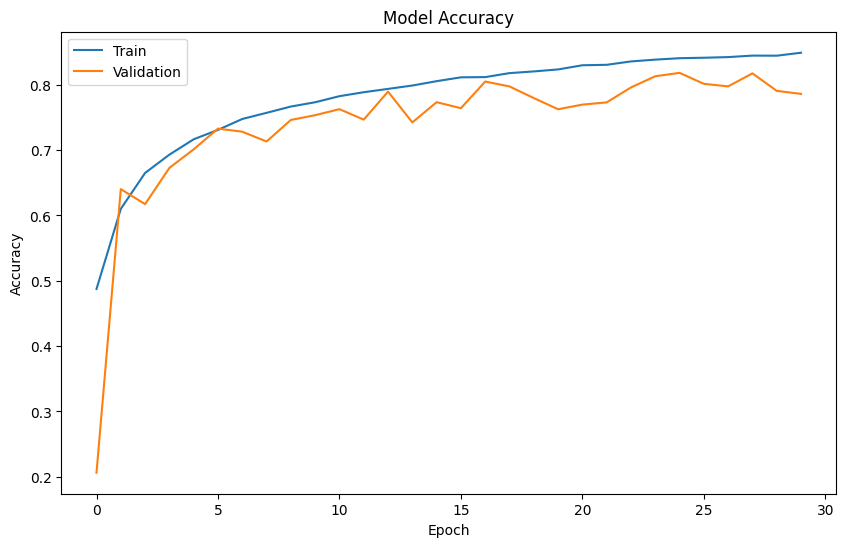

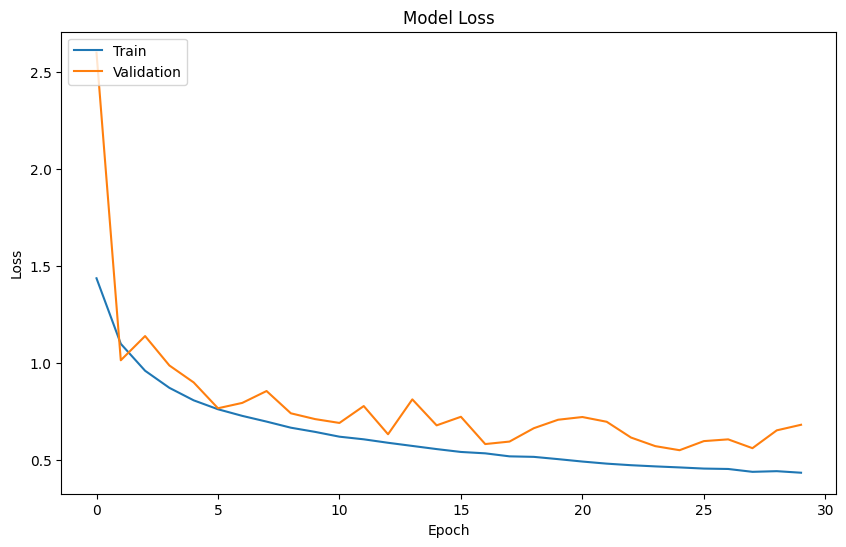

Model saved as model_20240527_002215_lr_0.001_opt_adam_acc_0.7755.h5
Training with adam optimizer and learning rate: 0.01
Epoch 1/30
313/313 [==============================] - 20s 62ms/step - loss: 0.9010 - accuracy: 0.6889 - val_loss: 1.2753 - val_accuracy: 0.6158
Epoch 2/30
313/313 [==============================] - 19s 61ms/step - loss: 0.7504 - accuracy: 0.7385 - val_loss: 1.0915 - val_accuracy: 0.6617
Epoch 3/30
313/313 [==============================] - 19s 61ms/step - loss: 0.6933 - accuracy: 0.7563 - val_loss: 1.7917 - val_accuracy: 0.5468
Epoch 4/30
313/313 [==============================] - 19s 62ms/step - loss: 0.6478 - accuracy: 0.7728 - val_loss: 0.8193 - val_accuracy: 0.7304
Epoch 5/30
313/313 [==============================] - 19s 61ms/step - loss: 0.6251 - accuracy: 0.7809 - val_loss: 1.0704 - val_accuracy: 0.6907
Epoch 6/30
313/313 [==============================] - 20s 63ms/step - loss: 0.6041 - accuracy: 0.7876 - val_loss: 0.7951 - val_accuracy: 0.7491
Epoch 7/30
313

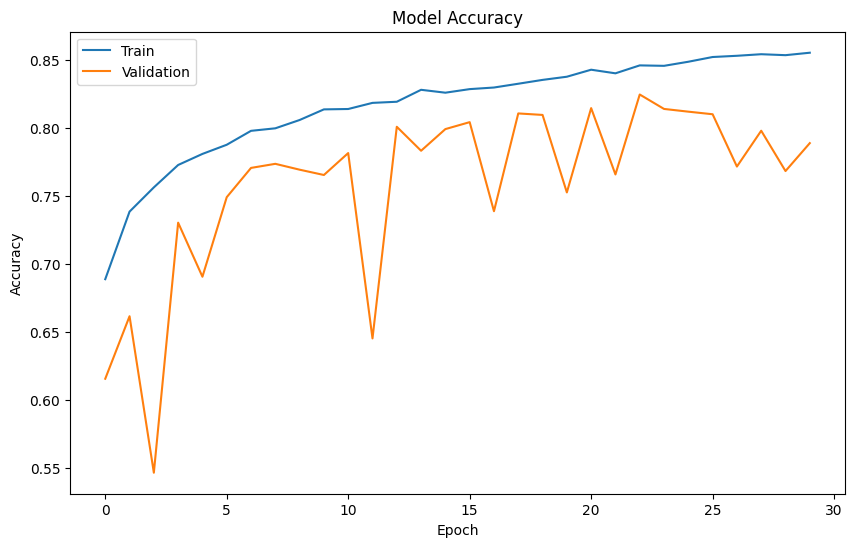

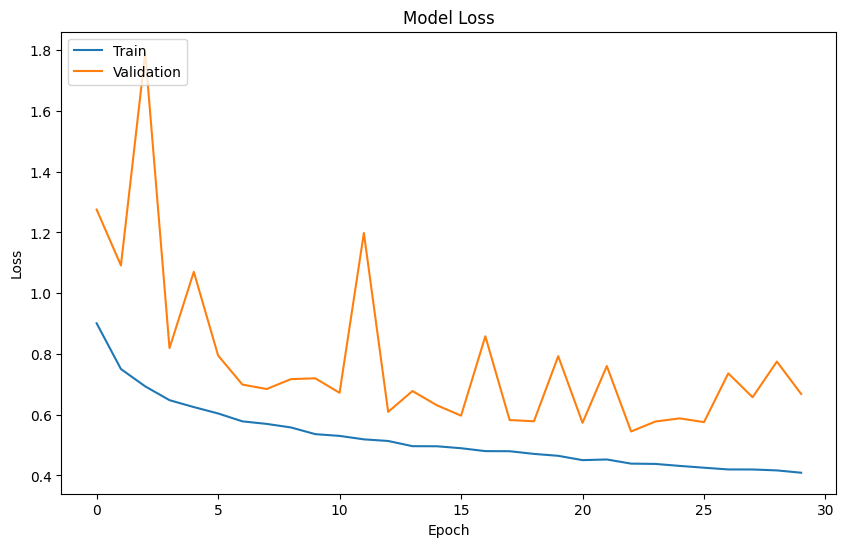

Model saved as model_20240527_003153_lr_0.01_opt_adam_acc_0.7888.h5
Training with adam optimizer and learning rate: 0.1
Epoch 1/30
313/313 [==============================] - 20s 62ms/step - loss: 1.2118 - accuracy: 0.5836 - val_loss: 4.3652 - val_accuracy: 0.3662
Epoch 2/30
313/313 [==============================] - 19s 62ms/step - loss: 1.0899 - accuracy: 0.6266 - val_loss: 5.5813 - val_accuracy: 0.2986
Epoch 3/30
313/313 [==============================] - 20s 62ms/step - loss: 1.0322 - accuracy: 0.6393 - val_loss: 1.6974 - val_accuracy: 0.5362
Epoch 4/30
313/313 [==============================] - 19s 60ms/step - loss: 0.9306 - accuracy: 0.6774 - val_loss: 1.7158 - val_accuracy: 0.5567
Epoch 5/30
313/313 [==============================] - 20s 62ms/step - loss: 0.8462 - accuracy: 0.7085 - val_loss: 1.0948 - val_accuracy: 0.6575
Epoch 6/30
313/313 [==============================] - 19s 60ms/step - loss: 0.8060 - accuracy: 0.7236 - val_loss: 1.2522 - val_accuracy: 0.7012
Epoch 7/30
313/3

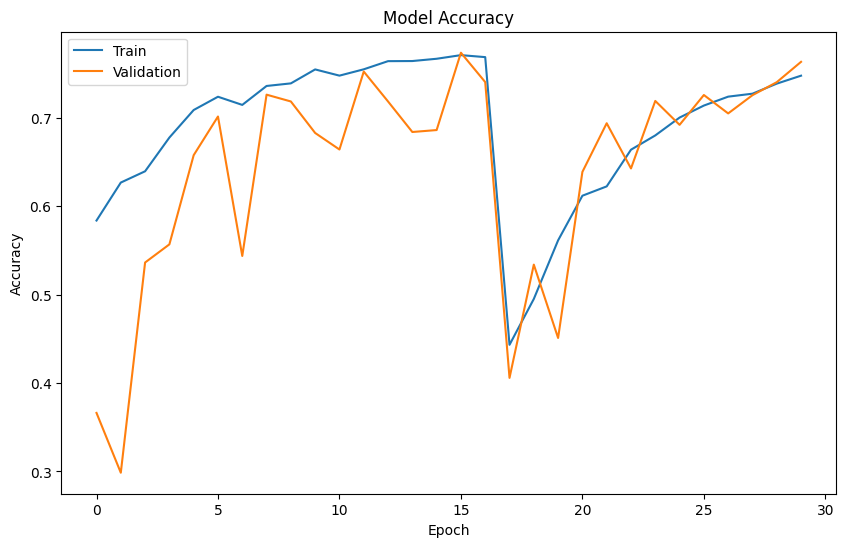

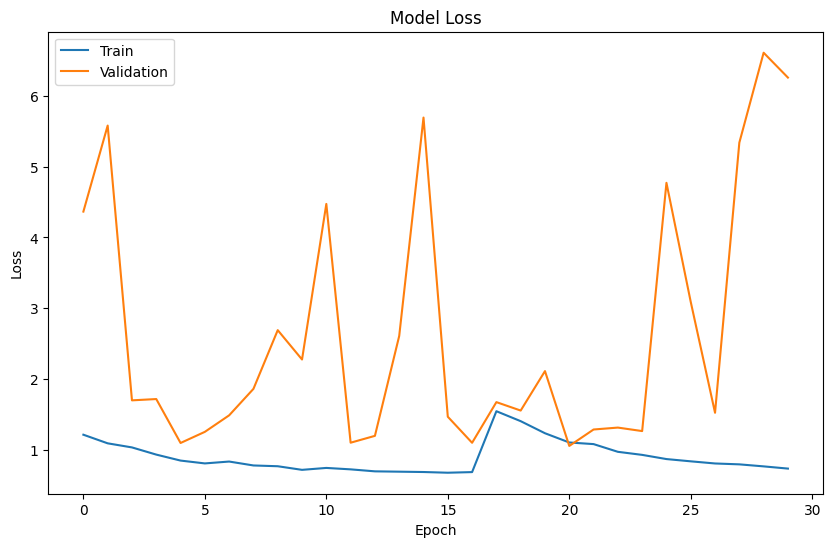

Model saved as model_20240527_004131_lr_0.1_opt_adam_acc_0.7594.h5
Training with sgd optimizer and learning rate: 0.001
Epoch 1/30
313/313 [==============================] - 20s 63ms/step - loss: 0.6928 - accuracy: 0.7600 - val_loss: 3.6721 - val_accuracy: 0.7719
Epoch 2/30
313/313 [==============================] - 19s 61ms/step - loss: 0.6781 - accuracy: 0.7658 - val_loss: 3.4613 - val_accuracy: 0.7739
Epoch 3/30
313/313 [==============================] - 19s 61ms/step - loss: 0.6714 - accuracy: 0.7674 - val_loss: 3.7477 - val_accuracy: 0.7748
Epoch 4/30
313/313 [==============================] - 19s 62ms/step - loss: 0.6659 - accuracy: 0.7696 - val_loss: 4.0044 - val_accuracy: 0.7743
Epoch 5/30
313/313 [==============================] - 19s 59ms/step - loss: 0.6656 - accuracy: 0.7699 - val_loss: 3.5223 - val_accuracy: 0.7746
Epoch 6/30
313/313 [==============================] - 19s 61ms/step - loss: 0.6663 - accuracy: 0.7696 - val_loss: 3.8736 - val_accuracy: 0.7751
Epoch 7/30
313/3

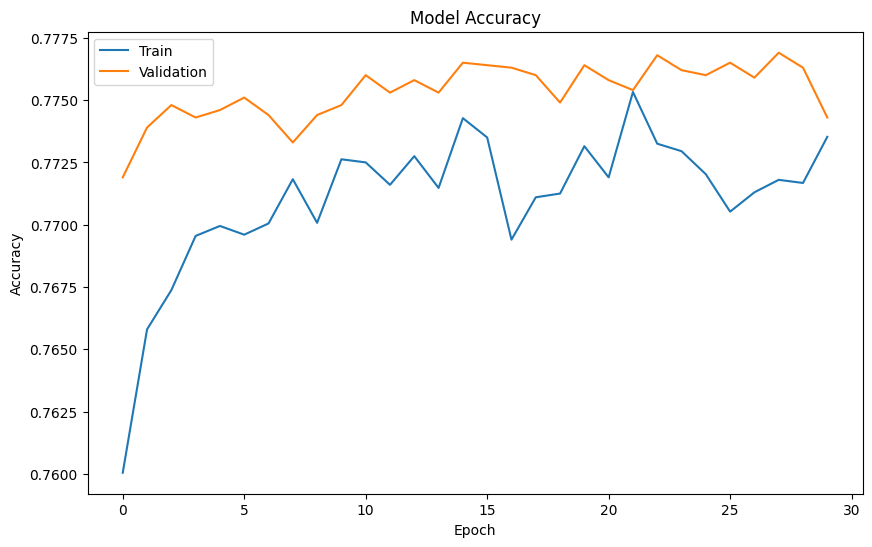

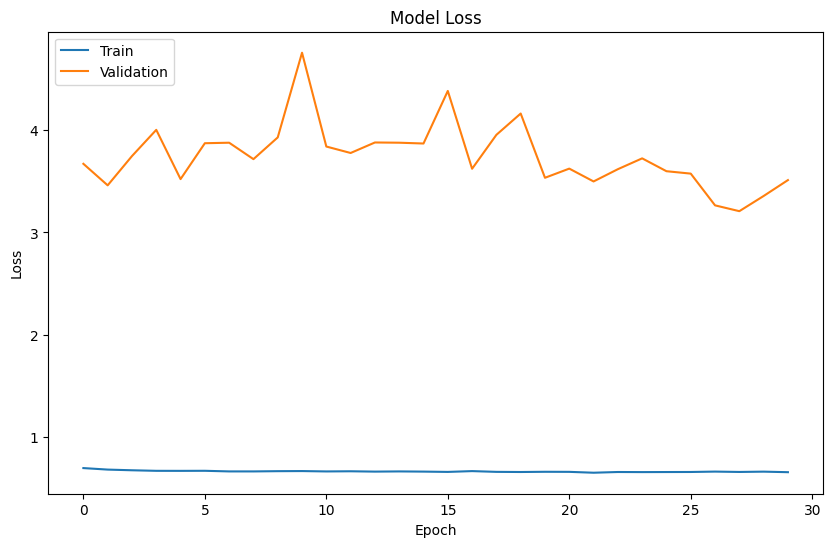

Model saved as model_20240527_005110_lr_0.001_opt_sgd_acc_0.7675.h5
Training with sgd optimizer and learning rate: 0.01
Epoch 1/30
313/313 [==============================] - 20s 62ms/step - loss: 0.6605 - accuracy: 0.7707 - val_loss: 3.5295 - val_accuracy: 0.7752
Epoch 2/30
313/313 [==============================] - 19s 60ms/step - loss: 0.6508 - accuracy: 0.7746 - val_loss: 3.8884 - val_accuracy: 0.7754
Epoch 3/30
313/313 [==============================] - 20s 63ms/step - loss: 0.6498 - accuracy: 0.7736 - val_loss: 3.7854 - val_accuracy: 0.7765
Epoch 4/30
313/313 [==============================] - 19s 61ms/step - loss: 0.6440 - accuracy: 0.7772 - val_loss: 3.5302 - val_accuracy: 0.7762
Epoch 5/30
313/313 [==============================] - 19s 60ms/step - loss: 0.6529 - accuracy: 0.7739 - val_loss: 3.2351 - val_accuracy: 0.7768
Epoch 6/30
313/313 [==============================] - 19s 62ms/step - loss: 0.6478 - accuracy: 0.7753 - val_loss: 3.4946 - val_accuracy: 0.7773
Epoch 7/30
313/3

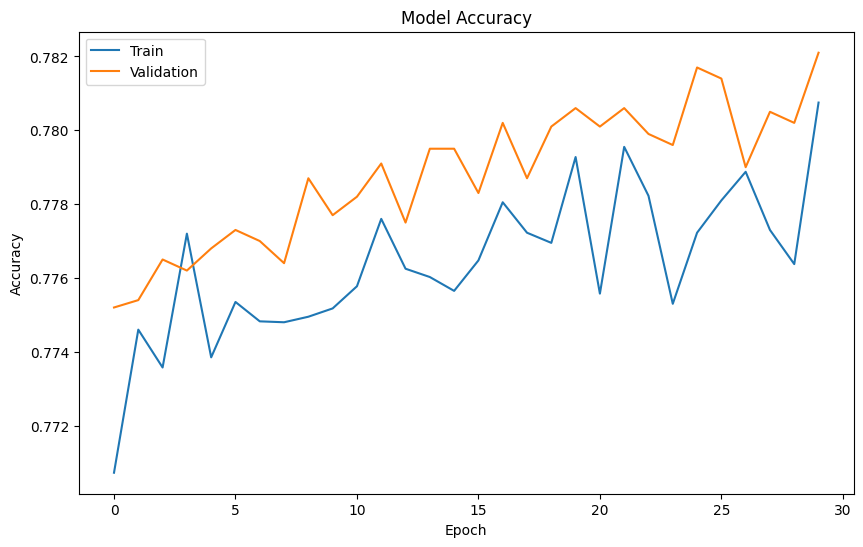

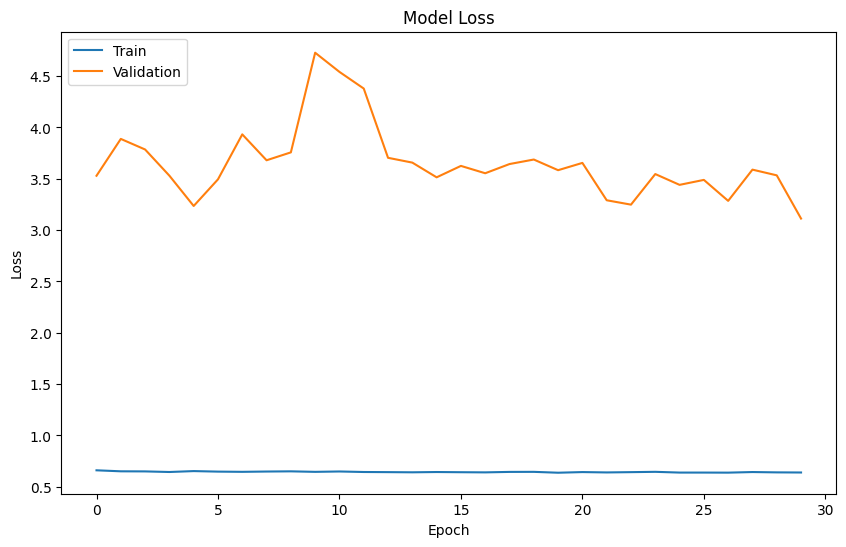

Model saved as model_20240527_010046_lr_0.01_opt_sgd_acc_0.7744.h5
Training with sgd optimizer and learning rate: 0.1
Epoch 1/30
313/313 [==============================] - 20s 61ms/step - loss: 0.6454 - accuracy: 0.7750 - val_loss: 3.1997 - val_accuracy: 0.7778
Epoch 2/30
313/313 [==============================] - 19s 60ms/step - loss: 0.6407 - accuracy: 0.7794 - val_loss: 3.7892 - val_accuracy: 0.7830
Epoch 3/30
313/313 [==============================] - 19s 59ms/step - loss: 0.6373 - accuracy: 0.7797 - val_loss: 3.8198 - val_accuracy: 0.7769
Epoch 4/30
313/313 [==============================] - 19s 60ms/step - loss: 0.6371 - accuracy: 0.7789 - val_loss: 3.7114 - val_accuracy: 0.7827
Epoch 5/30
313/313 [==============================] - 19s 61ms/step - loss: 0.6405 - accuracy: 0.7781 - val_loss: 3.1816 - val_accuracy: 0.7824
Epoch 6/30
313/313 [==============================] - 19s 61ms/step - loss: 0.6322 - accuracy: 0.7804 - val_loss: 3.3819 - val_accuracy: 0.7836
Epoch 7/30
313/313

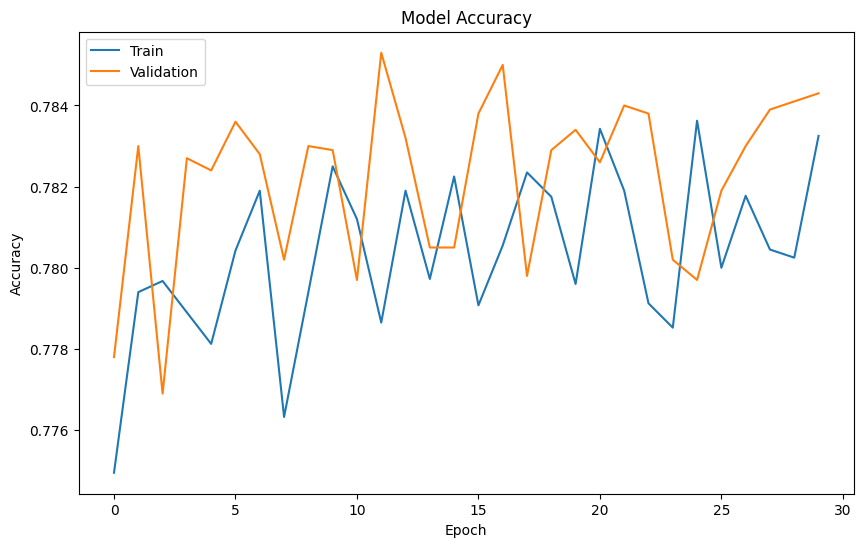

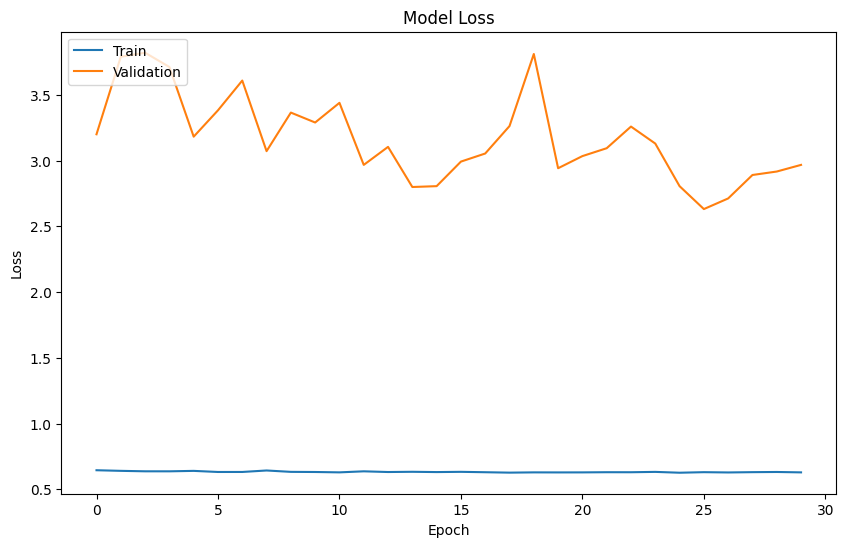

Model saved as model_20240527_011023_lr_0.1_opt_sgd_acc_0.7800.h5


In [6]:

#5
# Check if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("GPU not available, using CPU.")

# Load and preprocess the CIFAR-10 dataset
def load_data():
    (x, y), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    x, x_test = x / 255.0, x_test / 255.0
    y, y_test = tf.keras.utils.to_categorical(y, 10), tf.keras.utils.to_categorical(y_test, 10)

    # Split the data into train and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

    return x_train, y_train, x_val, y_val, x_test, y_test

# Define the input shape
def get_input_shape(x_train):
    input_shape = x_train.shape[1:]
    return input_shape

# Apply data augmentation
def augment_data(x_train):
    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    )
    datagen.fit(x_train)
    return datagen

# Build the model
def build_model(input_shape):
    model = tf.keras.Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])
    return model

# Compile the model with specified learning rate and optimizer
def compile_model(model, learning_rate, optimizer):
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer}")

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# def train_model(model, x_train, y_train, x_test, y_test, datagen, epochs=30):
#     history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
#                         epochs=epochs, validation_data=(x_test, y_test))
#     return history

def train_model(model, x_train, y_train, x_val, y_val, datagen, epochs=30):
    history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                        epochs=epochs, validation_data=(x_val, y_val)
                        )
    return history

# Evaluate the model
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f'Test accuracy: {test_acc}')
    return test_acc

def plot_metrics(history):
    # Plot accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Save the model with a timestamp and accuracy in the filename
def save_model(model, test_acc, learning_rate, optimizer):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_filename = f"model_{timestamp}_lr_{learning_rate}_opt_{optimizer}_acc_{test_acc:.4f}.h5"
    model.save(model_filename)
    print(f"Model saved as {model_filename}")

# Main function
def main():
    x_train, y_train, x_val, y_val, x_test, y_test = load_data()
    datagen = augment_data(x_train)
    input_shape = get_input_shape(x_train)
    model = build_model(input_shape)

    learning_rates = [0.001, 0.01, 0.1]
    optimizers = ['adam', 'sgd']
    epochs = 30

    for optimizer in optimizers:
        for learning_rate in learning_rates:
            print(f"Training with {optimizer} optimizer and learning rate: {learning_rate}")
            compile_model(model, learning_rate, optimizer)
            history = train_model(model, x_train, y_train, x_val, y_val, datagen, epochs)
            test_acc = evaluate_model(model, x_test, y_test)
            plot_metrics(history)
            save_model(model, test_acc, learning_rate, optimizer)

if __name__ == "__main__":
    main()

6. Early Stopping:

Experiment: Early stopping was implemented to prevent overfitting and find the optimal number of training epochs.

Epoch 1/100
313/313 [==============================] - 22s 62ms/step - loss: 1.5376 - accuracy: 0.4465 - val_loss: 1.4681 - val_accuracy: 0.5085
Epoch 2/100
313/313 [==============================] - 19s 62ms/step - loss: 1.1508 - accuracy: 0.5909 - val_loss: 1.9426 - val_accuracy: 0.4482
Epoch 3/100
313/313 [==============================] - 19s 60ms/step - loss: 0.9733 - accuracy: 0.6557 - val_loss: 1.1017 - val_accuracy: 0.6251
Epoch 4/100
313/313 [==============================] - 19s 62ms/step - loss: 0.8750 - accuracy: 0.6924 - val_loss: 1.1784 - val_accuracy: 0.6348
Epoch 5/100
313/313 [==============================] - 19s 59ms/step - loss: 0.8182 - accuracy: 0.7103 - val_loss: 0.8408 - val_accuracy: 0.7094
Epoch 6/100
313/313 [==============================] - 19s 60ms/step - loss: 0.7699 - accuracy: 0.7280 - val_loss: 0.7681 - val_accuracy: 0.7393
Epoch 7/100
313/313 [==============================] - 18s 59ms/step - loss: 0.7404 - accuracy: 0.7388 - val_loss: 0.8836 - val_ac

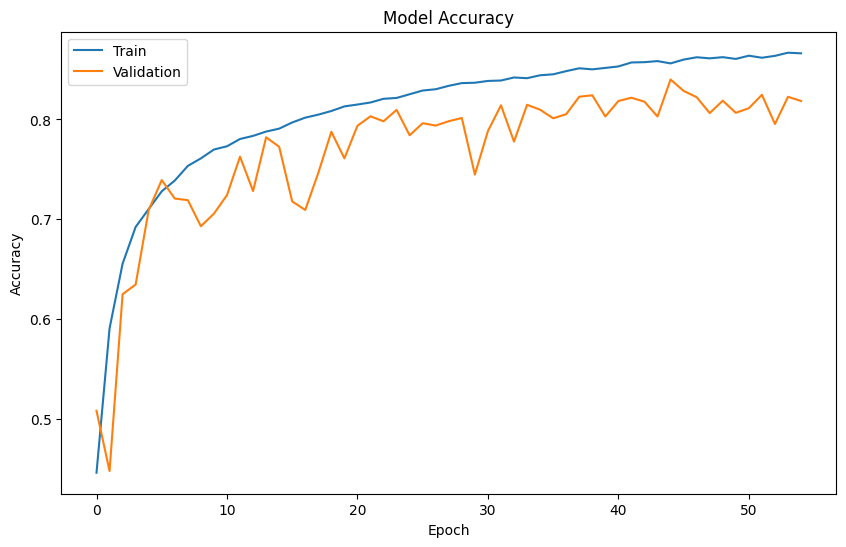

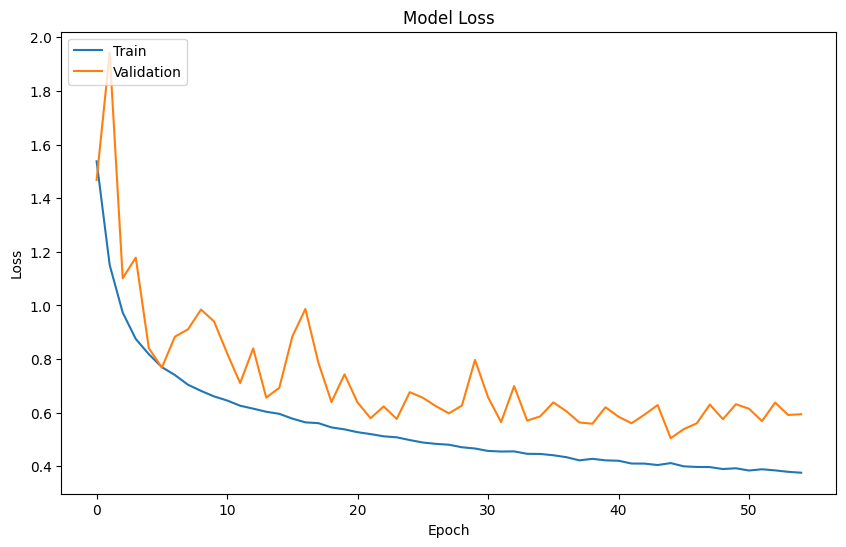

Model saved as model_20240527_140035_acc_0.8313.h5


In [3]:


# Check if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("GPU not available, using CPU.")

# Load and preprocess the CIFAR-10 dataset
def load_data():
    (x, y), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    x, x_test = x / 255.0, x_test / 255.0
    y, y_test = tf.keras.utils.to_categorical(y, 10), tf.keras.utils.to_categorical(y_test, 10)

    # Split the data into train and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

    return x_train, y_train, x_val, y_val, x_test, y_test

# Define the input shape
def get_input_shape(x_train):
    input_shape = x_train.shape[1:]
    return input_shape

# Apply data augmentation
def augment_data(x_train):
    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    )
    datagen.fit(x_train)
    return datagen

# Build the model
def build_model(input_shape):
    model = tf.keras.Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])
    return model

# Compile the model
def compile_model(model, learning_rate, optimizer):
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer}")

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
def train_model(model, x_train, y_train, x_val, y_val, datagen, epochs=100, patience=10):
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                        epochs=epochs, validation_data=(x_val, y_val),
                        callbacks=[early_stopping])
    return history
# Evaluate the model
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f'Test accuracy: {test_acc}')
    return test_acc

def plot_metrics(history):
    # Plot accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Save the model with a timestamp and accuracy in the filename
def save_model(model, test_acc):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_filename = f"model_{timestamp}_acc_{test_acc:.4f}.h5"
    model.save(model_filename)
    print(f"Model saved as {model_filename}")

def main():
    x_train, y_train, x_val, y_val, x_test, y_test = load_data()
    datagen = augment_data(x_train)
    input_shape = get_input_shape(x_train)
    model = build_model(input_shape)

    learning_rate = 0.01
    optimizer = 'adam'
    epochs = 100
    patience = 10

    compile_model(model, learning_rate, optimizer)
    history = train_model(model, x_train, y_train, x_val, y_val,  datagen, epochs, patience)
    test_acc = evaluate_model(model, x_test, y_test)
    plot_metrics(history)
    save_model(model, test_acc)

if __name__ == "__main__":
    main()

7.Regularization Techniques:
Experiment: Dropout layers were added after each max pooling layer and before the final dense layer.

Epoch 1/100
313/313 [==============================] - 19s 59ms/step - loss: 1.6773 - accuracy: 0.3984 - val_loss: 1.5064 - val_accuracy: 0.4547
Epoch 2/100
313/313 [==============================] - 18s 59ms/step - loss: 1.3080 - accuracy: 0.5299 - val_loss: 1.1756 - val_accuracy: 0.5871
Epoch 3/100
313/313 [==============================] - 19s 60ms/step - loss: 1.1532 - accuracy: 0.5880 - val_loss: 1.1354 - val_accuracy: 0.6152
Epoch 4/100
313/313 [==============================] - 19s 59ms/step - loss: 1.0753 - accuracy: 0.6218 - val_loss: 1.6090 - val_accuracy: 0.5181
Epoch 5/100
313/313 [==============================] - 19s 62ms/step - loss: 1.0171 - accuracy: 0.6443 - val_loss: 1.0719 - val_accuracy: 0.6287
Epoch 6/100
313/313 [==============================] - 19s 60ms/step - loss: 0.9743 - accuracy: 0.6574 - val_loss: 0.9208 - val_accuracy: 0.6851
Epoch 7/100
313/313 [==============================] - 19s 61ms/step - loss: 0.9461 - accuracy: 0.6708 - val_loss: 0.9269 - val_ac

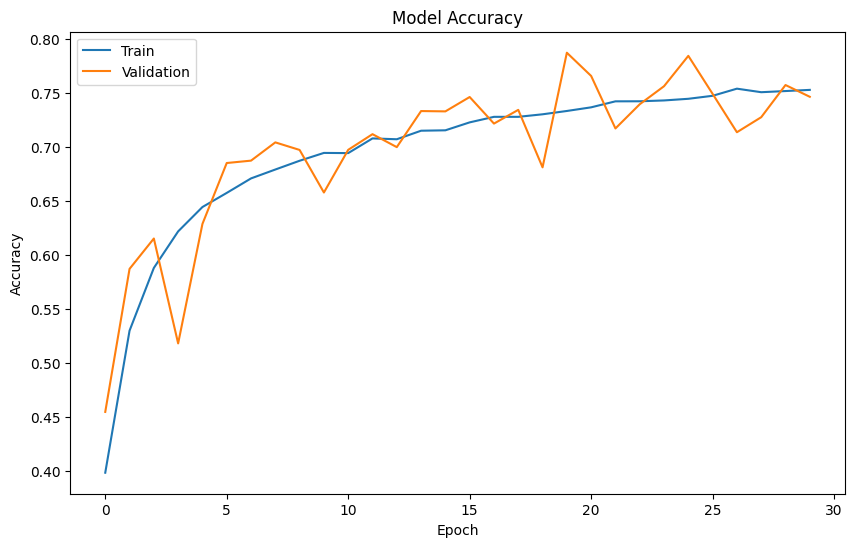

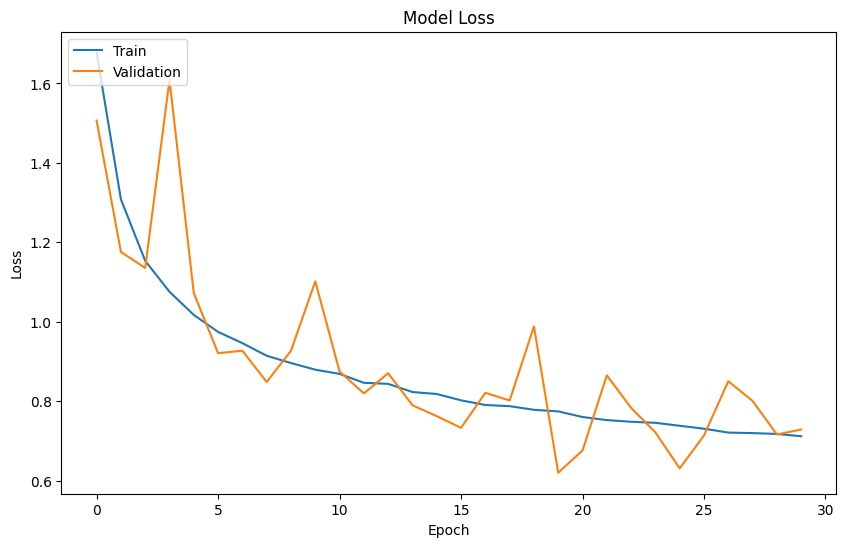

Model saved as model_20240527_141021_acc_0.7812.h5


In [4]:
# Check if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("GPU not available, using CPU.")

# Load and preprocess the CIFAR-10 dataset
def load_data():
    (x, y), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    x, x_test = x / 255.0, x_test / 255.0
    y, y_test = tf.keras.utils.to_categorical(y, 10), tf.keras.utils.to_categorical(y_test, 10)

    # Split the data into train and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

    return x_train, y_train, x_val, y_val, x_test, y_test

# Define the input shape
def get_input_shape(x_train):
    input_shape = x_train.shape[1:]
    return input_shape

# Apply data augmentation
def augment_data(x_train):
    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    )
    datagen.fit(x_train)
    return datagen

# Build the model with dropout layers
def build_model(input_shape):
    model = tf.keras.Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# Compile the model
def compile_model(model, learning_rate, optimizer):
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer}")

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
def train_model(model, x_train, y_train, x_val, y_val,  datagen, epochs=100, patience=10):
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                        epochs=epochs, validation_data=(x_val, y_val),
                        callbacks=[early_stopping])
    return history

# Evaluate the model
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f'Test accuracy: {test_acc}')
    return test_acc

# Plot training and validation metrics
def plot_metrics(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Save the model with a timestamp and accuracy in the filename
def save_model(model, test_acc):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_filename = f"model_{timestamp}_acc_{test_acc:.4f}.h5"
    model.save(model_filename)
    print(f"Model saved as {model_filename}")

# Main function
def main():
    x_train, y_train, x_val, y_val, x_test, y_test = load_data()
    datagen = augment_data(x_train)
    input_shape = get_input_shape(x_train)
    model = build_model(input_shape)

    learning_rate = 0.01
    optimizer = 'adam'
    epochs = 100
    patience = 10

    compile_model(model, learning_rate, optimizer)
    history = train_model(model, x_train, y_train, x_val, y_val,  datagen, epochs, patience)
    test_acc = evaluate_model(model, x_test, y_test)
    plot_metrics(history)
    save_model(model, test_acc)

if __name__ == "__main__":
    main()